In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.linear_model import SGDRegressor,Lasso,Ridge
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA,TruncatedSVD
from lightgbm import LGBMRegressor
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Dropout,Embedding,Concatenate,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.regularizers import l2,l1,l1_l2
#from tensorflow.keras.initializers import 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from tqdm import tqdm
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

In [7]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
df=pd.read_csv('preprocessed1.csv')
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_name_len,subcat1,subcat2,subcat3,subcat4,subcat5,name_each_sen_word,item_desc_each_sentence_word
0,0,mlb cincinnati red shirt size,3,Men/Tops/T-shirts,NaN,10.0,1,description_yet,3,Men,Tops,T-shirts,NaN,NaN,5,1
1,1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,razer,52.0,0,keyboard great condition work like came box po...,3,Electronics,Computers & Tablets,Components & Parts,NaN,NaN,4,17
2,2,ava viv blouse,1,Women/Tops & Blouses/Blouse,target,10.0,1,adorable top hint lace key hole back pale pink...,3,Women,Tops & Blouses,Blouse,NaN,NaN,3,12
3,3,leather horse statue,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,new tag leather horse retail stand foot high s...,3,Home,Home Décor,Home Décor Accents,NaN,NaN,3,17
4,4,k gold plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,complete certificate authenticity,3,Women,Jewelry,Necklaces,NaN,NaN,4,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476208 entries, 0 to 1476207
Data columns (total 16 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   train_id                      1476208 non-null  int64  
 1   name                          1475473 non-null  object 
 2   item_condition_id             1476208 non-null  int64  
 3   category_name                 1476208 non-null  object 
 4   brand_name                    846983 non-null   object 
 5   price                         1476208 non-null  float64
 6   shipping                      1476208 non-null  int64  
 7   item_description              1473452 non-null  object 
 8   category_name_len             1476208 non-null  int64  
 9   subcat1                       1476208 non-null  object 
 10  subcat2                       1476208 non-null  object 
 11  subcat3                       1476208 non-null  object 
 12  subcat4                     

In [10]:
df[df['item_description'].isna()]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_name_len,subcat1,subcat2,subcat3,subcat4,subcat5,name_each_sen_word,item_desc_each_sentence_word
187,189,marucci pro cut,3,Sports & Outdoors/Team Sports/Baseball & Softball,marucci,46.0,0,NaN,3,Sports & Outdoors,Team Sports,Baseball & Softball,NaN,NaN,3,1
1441,1449,indian cent,3,Vintage & Collectibles/Antique/100 Years or Older,NaN,14.0,0,NaN,3,Vintage & Collectibles,Antique,100 Years or Older,NaN,NaN,2,1
2715,2730,lip gloss set,1,Beauty/Makeup/Lips,victoria's secret,14.0,0,NaN,3,Beauty,Makeup,Lips,NaN,NaN,3,1
3534,3552,strappy black lingerie,1,Women/Underwear/Panties,NaN,8.0,1,NaN,3,Women,Underwear,Panties,NaN,NaN,3,1
7456,7488,twilight wood spray,2,Beauty/Skin Care/Body,NaN,8.0,1,NaN,3,Beauty,Skin Care,Body,NaN,NaN,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472135,1478444,garbordor secret rare,2,Vintage & Collectibles/Trading Cards/Animation,pokemon,11.0,1,NaN,3,Vintage & Collectibles,Trading Cards,Animation,NaN,NaN,3,1
1473397,1479712,daisy marc jacob,1,Beauty/Fragrance/Women,NaN,45.0,1,NaN,3,Beauty,Fragrance,Women,NaN,NaN,3,1
1474058,1480376,girl dress flamingo dress,3,Kids/Girls 2T-5T/Dresses,NaN,18.0,0,NaN,3,Kids,Girls 2T-5T,Dresses,NaN,NaN,4,1
1474698,1481020,tin bottle,3,Vintage & Collectibles/Other/Other,NaN,26.0,0,NaN,3,Vintage & Collectibles,Other,Other,NaN,NaN,2,1


In [11]:
np.median(df[df['brand_name'].isna()]['price'].values)

14.0

In [12]:
df[df['brand_name'].isna()]['price'].sum()/df[df['brand_name'].isna()]['price'].shape[0]

21.123863482855896

In [13]:
np.median(df[df['brand_name'].notna()]['price'].values)

20.0

In [14]:
df[df['brand_name'].notna()]['price'].sum()/df[df['brand_name'].notna()]['price'].shape[0]

30.917938730765552

In [15]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_name_len,subcat1,subcat2,subcat3,subcat4,subcat5,name_each_sen_word,item_desc_each_sentence_word
0,0,mlb cincinnati red shirt size,3,Men/Tops/T-shirts,NaN,10.0,1,description_yet,3,Men,Tops,T-shirts,NaN,NaN,5,1
1,1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,razer,52.0,0,keyboard great condition work like came box po...,3,Electronics,Computers & Tablets,Components & Parts,NaN,NaN,4,17
2,2,ava viv blouse,1,Women/Tops & Blouses/Blouse,target,10.0,1,adorable top hint lace key hole back pale pink...,3,Women,Tops & Blouses,Blouse,NaN,NaN,3,12
3,3,leather horse statue,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,new tag leather horse retail stand foot high s...,3,Home,Home Décor,Home Décor Accents,NaN,NaN,3,17
4,4,k gold plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,complete certificate authenticity,3,Women,Jewelry,Necklaces,NaN,NaN,4,3


In [16]:
df['brand_name_exist']=df['brand_name'].fillna(value='no')

In [17]:
df['brand_name_exist']=df['brand_name_exist'].apply(lambda x:'yes' if x!='no' else x)

C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'range of prices with no brand name and brand name')

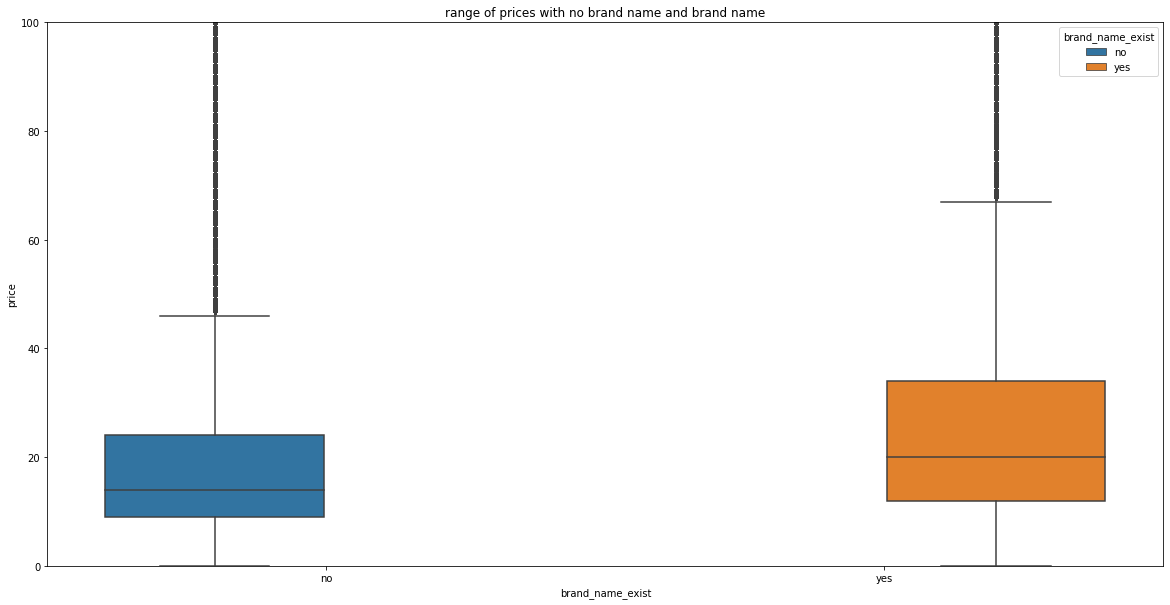

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(df['brand_name_exist'],df['price'],hue=df['brand_name_exist'])
plt.ylim(0,100)
plt.title('range of prices with no brand name and brand name')

C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


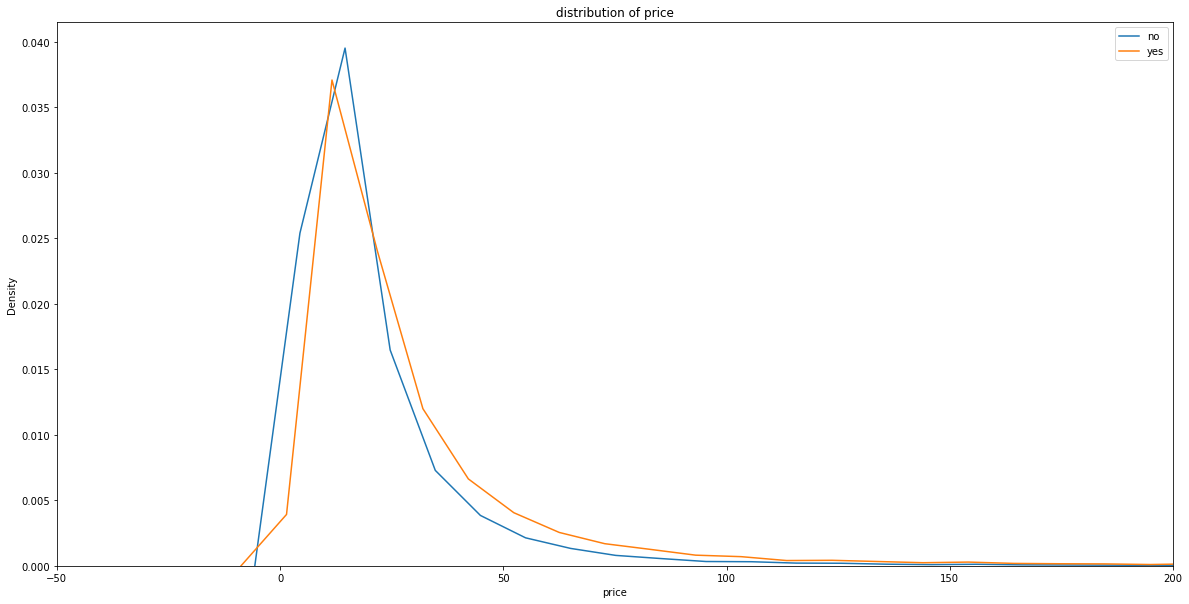

In [19]:
plt.figure(figsize=(20,10))
sns.distplot(df[df['brand_name_exist']=='no']['price'],hist=False,label='no')
sns.distplot(df[df['brand_name_exist']=='yes']['price'],hist=False,label='yes')
plt.legend()
plt.title('distribution of price')
plt.xlim(-50,200)
plt.show()

In [20]:
label_enc_brand_name=LabelEncoder()
df['brand_name_exist_enc']=label_enc_brand_name.fit_transform(df['brand_name_exist'].values)

In [21]:
sc.stats.spearmanr(df['brand_name_exist_enc'].values,df['price'].values)

SpearmanrResult(correlation=0.20763692303787482, pvalue=0.0)

In [22]:
df['brand_name_exist_enc']

0          0
1          1
2          1
3          0
4          0
          ..
1476203    1
1476204    1
1476205    0
1476206    0
1476207    0
Name: brand_name_exist_enc, Length: 1476208, dtype: int32

after adding this feature this feature's correlation with price is almost 0.21 , but is we do this then the data is too large and it is taking too much time to train model on this big data so that's why i decided to drop row with nan brand name. 

In [23]:
# df['brand_name']=df['brand_name'].apply(lambda x:str(x))

df['subcat1']=df['subcat1'].apply(lambda x:str(x))
df['subcat2']=df['subcat2'].apply(lambda x:str(x))
df['subcat3']=df['subcat3'].apply(lambda x:str(x))
df['subcat4']=df['subcat4'].apply(lambda x:str(x))
df['subcat5']=df['subcat5'].apply(lambda x:str(x))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476208 entries, 0 to 1476207
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   train_id                      1476208 non-null  int64  
 1   name                          1475473 non-null  object 
 2   item_condition_id             1476208 non-null  int64  
 3   category_name                 1476208 non-null  object 
 4   brand_name                    846983 non-null   object 
 5   price                         1476208 non-null  float64
 6   shipping                      1476208 non-null  int64  
 7   item_description              1473452 non-null  object 
 8   category_name_len             1476208 non-null  int64  
 9   subcat1                       1476208 non-null  object 
 10  subcat2                       1476208 non-null  object 
 11  subcat3                       1476208 non-null  object 
 12  subcat4                     

In [25]:
df=df.dropna()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845408 entries, 1 to 1476204
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   train_id                      845408 non-null  int64  
 1   name                          845408 non-null  object 
 2   item_condition_id             845408 non-null  int64  
 3   category_name                 845408 non-null  object 
 4   brand_name                    845408 non-null  object 
 5   price                         845408 non-null  float64
 6   shipping                      845408 non-null  int64  
 7   item_description              845408 non-null  object 
 8   category_name_len             845408 non-null  int64  
 9   subcat1                       845408 non-null  object 
 10  subcat2                       845408 non-null  object 
 11  subcat3                       845408 non-null  object 
 12  subcat4                       845408 non-nu

In [27]:
df['item_description']=df['item_description'].apply(lambda x:str(x))
df['category_name']=df['category_name'].apply(lambda x:str(x))
# df['brand_name']=df['brand_name'].apply(lambda x:str(x))
df['name']=df['name'].apply(lambda x:str(x))

# df['brand_name']=df['brand_name'].apply(lambda x:str(x))
# df['subcat1']=df['subcat1'].apply(lambda x:str(x))
# df['subcat2']=df['subcat2'].apply(lambda x:str(x))
# df['subcat3']=df['subcat3'].apply(lambda x:str(x))
# df['subcat4']=df['subcat4'].apply(lambda x:str(x))
# df['subcat5']=df['subcat5'].apply(lambda x:str(x))

In [28]:
df.shape

(845408, 18)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845408 entries, 1 to 1476204
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   train_id                      845408 non-null  int64  
 1   name                          845408 non-null  object 
 2   item_condition_id             845408 non-null  int64  
 3   category_name                 845408 non-null  object 
 4   brand_name                    845408 non-null  object 
 5   price                         845408 non-null  float64
 6   shipping                      845408 non-null  int64  
 7   item_description              845408 non-null  object 
 8   category_name_len             845408 non-null  int64  
 9   subcat1                       845408 non-null  object 
 10  subcat2                       845408 non-null  object 
 11  subcat3                       845408 non-null  object 
 12  subcat4                       845408 non-nu

In [30]:
df.drop(columns=['brand_name_exist','train_id','category_name','brand_name_exist_enc'],inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845408 entries, 1 to 1476204
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   name                          845408 non-null  object 
 1   item_condition_id             845408 non-null  int64  
 2   brand_name                    845408 non-null  object 
 3   price                         845408 non-null  float64
 4   shipping                      845408 non-null  int64  
 5   item_description              845408 non-null  object 
 6   category_name_len             845408 non-null  int64  
 7   subcat1                       845408 non-null  object 
 8   subcat2                       845408 non-null  object 
 9   subcat3                       845408 non-null  object 
 10  subcat4                       845408 non-null  object 
 11  subcat5                       845408 non-null  object 
 12  name_each_sen_word            845408 non-nu

In [32]:
# df=pd.read_csv('preprocessed2.csv')

In [33]:
df.shape

(845408, 14)

In [34]:
y=df['price']
X=df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
df.columns

Index(['name', 'item_condition_id', 'brand_name', 'price', 'shipping',
       'item_description', 'category_name_len', 'subcat1', 'subcat2',
       'subcat3', 'subcat4', 'subcat5', 'name_each_sen_word',
       'item_desc_each_sentence_word'],
      dtype='object')

In [36]:
# df.to_csv('preprocessed2.csv',index=False)

In [37]:
del X,y,df

In [32]:
# def preprocess_test_data(df_test):

In [33]:
# test_df=pd.read_csv('test_preprocessed.csv')

In [31]:
scaler=MinMaxScaler()
scaler.fit(np.array(y_train).reshape(-1,1))
y_train_minmax=scaler.transform(np.array(y_train).reshape(-1,1))

y_test_minmax=scaler.transform(np.array(y_test).reshape(-1,1))

In [32]:
np.save('y_train_minmax',y_train_minmax)
np.save('y_test_minmax',y_test_minmax)
np.save('y_train',y_train)
np.save('y_test',y_test)

# feature engineering

# using bow

### converting name to bow

In [33]:
count_vect=CountVectorizer(min_df=50)
count_vect.fit(X_train['name'])
train_name_ohe = count_vect.transform(X_train['name'])
test_name_ohe = count_vect.transform(X_test['name'])

In [34]:
print(train_name_ohe.shape)
print(test_name_ohe.shape)

(566423, 3254)
(278985, 3254)


### converting item_description to bow

In [35]:
count_vect=CountVectorizer(min_df=500)
count_vect.fit(X_train['item_description'])
train_item_description_ohe = count_vect.transform(X_train['item_description'])
test_item_description_ohe = count_vect.transform(X_test['item_description'])

In [36]:
print(train_item_description_ohe.shape)
print(test_item_description_ohe.shape)

(566423, 1790)
(278985, 1790)


### on hot encoding of brand name

In [37]:
o_h_e=OneHotEncoder(handle_unknown='ignore')
o_h_e.fit(X_train['brand_name'].values.reshape(-1,1))
train_br_name_ohe=o_h_e.transform(X_train['brand_name'].values.reshape(-1,1))
test_br_name_ohe=o_h_e.transform(X_test['brand_name'].values.reshape(-1,1))
print(train_br_name_ohe.shape)
print(test_br_name_ohe.shape)

(566423, 4297)
(278985, 4297)


### on hot encoding of subcat1

In [38]:
o_h_e=OneHotEncoder(handle_unknown='ignore')
o_h_e.fit(X_train['subcat1'].values.reshape(-1,1))
train_subcat1_ohe=o_h_e.transform(X_train['subcat1'].values.reshape(-1,1))
test_subcat1_ohe=o_h_e.transform(X_test['subcat1'].values.reshape(-1,1))
print(train_subcat1_ohe.shape)
print(test_subcat1_ohe.shape)

(566423, 10)
(278985, 10)


### on hot encoding of subcat2

In [39]:
o_h_e=OneHotEncoder(handle_unknown='ignore')
o_h_e.fit(X_train['subcat2'].values.reshape(-1,1))
train_subcat2_ohe=o_h_e.transform(X_train['subcat2'].values.reshape(-1,1))
test_subcat2_ohe=o_h_e.transform(X_test['subcat2'].values.reshape(-1,1))
print(train_subcat2_ohe.shape)
print(test_subcat2_ohe.shape)

(566423, 102)
(278985, 102)


### on hot encoding of subcat3

In [40]:
o_h_e=OneHotEncoder(handle_unknown='ignore')
o_h_e.fit(X_train['subcat3'].values.reshape(-1,1))
train_subcat3_ohe=o_h_e.transform(X_train['subcat3'].values.reshape(-1,1))
test_subcat3_ohe=o_h_e.transform(X_test['subcat3'].values.reshape(-1,1))
print(train_subcat3_ohe.shape)
print(test_subcat3_ohe.shape)

(566423, 643)
(278985, 643)


### on hot encoding of subcat4

In [41]:
o_h_e=OneHotEncoder(handle_unknown='ignore')
o_h_e.fit(X_train['subcat4'].values.reshape(-1,1))
train_subcat4_ohe=o_h_e.transform(X_train['subcat4'].values.reshape(-1,1))
test_subcat4_ohe=o_h_e.transform(X_test['subcat4'].values.reshape(-1,1))
print(train_subcat4_ohe.shape)
print(test_subcat4_ohe.shape)

(566423, 6)
(278985, 6)


### on hot encoding of subcat5

In [42]:
o_h_e=OneHotEncoder(handle_unknown='ignore')
o_h_e.fit(X_train['subcat5'].values.reshape(-1,1))
train_subcat5_ohe=o_h_e.transform(X_train['subcat5'].values.reshape(-1,1))
test_subcat5_ohe=o_h_e.transform(X_test['subcat5'].values.reshape(-1,1))
print(train_subcat5_ohe.shape)
print(test_subcat5_ohe.shape)

(566423, 3)
(278985, 3)


### minmax scaling of category_name_len

In [34]:
scaler=MinMaxScaler()
scaler.fit(X_train['category_name_len'].values.reshape(-1,1))
x_tr_category_name_len=scaler.transform(X_train['category_name_len'].values.reshape(-1,1))

x_te_category_name_len=scaler.transform(X_test['category_name_len'].values.reshape(-1,1))

### minmax scaling of item_condition_id

In [35]:
scaler=MinMaxScaler()
scaler.fit(X_train['item_condition_id'].values.reshape(-1,1))
x_tr_item_condition_id=scaler.transform(X_train['item_condition_id'].values.reshape(-1,1))

x_te_item_condition_id=scaler.transform(X_test['item_condition_id'].values.reshape(-1,1))

### minmax scaling of name_each_sen_word

In [36]:
scaler=MinMaxScaler()
scaler.fit(X_train['name_each_sen_word'].values.reshape(-1,1))
x_tr_name_each_sen_word=scaler.transform(X_train['name_each_sen_word'].values.reshape(-1,1))

x_te_name_each_sen_word=scaler.transform(X_test['name_each_sen_word'].values.reshape(-1,1))

### minmax scaling of item_desc_each_sentence_word

In [37]:
scaler=MinMaxScaler()
scaler.fit(X_train['item_desc_each_sentence_word'].values.reshape(-1,1))
x_tr_item_desc_words_len =scaler.transform(X_train['item_desc_each_sentence_word'].values.reshape(-1,1))

x_te_item_desc_words_len =scaler.transform(X_test['item_desc_each_sentence_word'].values.reshape(-1,1))

### reshaping shipping, brand_name_exist_enc

In [38]:
# x_tr_item_condition_id=X_train['item_condition_id'].values.reshape(989059,1)
x_tr_shipping=X_train['shipping'].values.reshape(566423,1)
# x_tr_category_name_len=X_train['category_name_len'].values.reshape(989059,1)
# x_tr_brand_name_exist_enc=X_train['brand_name_exist_enc'].values.reshape(566423,1)

# x_te_item_condition_id=X_test['item_condition_id'].values.reshape(487149,1)
x_te_shipping=X_test['shipping'].values.reshape(278985,1)
# x_te_category_name_len=X_test['category_name_len'].values.reshape(487149,1)
# x_te_brand_name_exist_enc=X_test['brand_name_exist_enc'].values.reshape(278985,1)

### concatenating all train vectors with scipy hstack

In [50]:
x_tr_o_h_e = sc.sparse.hstack((train_name_ohe,train_item_description_ohe,train_br_name_ohe,train_subcat1_ohe,
                               train_subcat2_ohe,train_subcat3_ohe,train_subcat4_ohe,train_subcat5_ohe,
                               x_tr_category_name_len,x_tr_item_condition_id,x_tr_name_each_sen_word,x_tr_item_desc_words_len,x_tr_shipping))

In [51]:
x_tr_o_h_e.shape

(566423, 10110)

### concatenating all test vectors with scipy hstack

In [52]:
x_te_o_h_e = sc.sparse.hstack((test_name_ohe,test_item_description_ohe,test_br_name_ohe,test_subcat1_ohe,
                               test_subcat2_ohe,test_subcat3_ohe,test_subcat4_ohe,test_subcat5_ohe,
                               x_te_category_name_len,x_te_item_condition_id,x_te_name_each_sen_word,x_te_item_desc_words_len,x_te_shipping))

In [53]:
x_te_o_h_e.shape

(278985, 10110)

In [54]:
# saving x_tr_o_h_e AND x_te_o_h_e.
sc.sparse.save_npz('train_OHE.npz',x_tr_o_h_e)
sc.sparse.save_npz('test_OHE.npz',x_te_o_h_e)

# using tf-idf

### converting name and description in tfidf vector

In [48]:
vect=TfidfVectorizer(min_df=200)
vect.fit(X_train['name'])
train_tfidf_name=vect.transform(X_train['name'])
test_tfidf_name=vect.transform(X_test['name'])
print(train_tfidf_name.shape)
print(test_tfidf_name.shape)

(566423, 1310)
(278985, 1310)


In [49]:
vect=TfidfVectorizer(min_df=500)
vect.fit(X_train['item_description'])
train_tfidf_item_desc=vect.transform(X_train['item_description'])
test_tfidf_item_desc=vect.transform(X_test['item_description'])
print(train_tfidf_item_desc.shape)
print(test_tfidf_item_desc.shape)

(566423, 1790)
(278985, 1790)


### concatenating all train vectors with scipy hstack

In [57]:
x_tr_tfidf = sc.sparse.hstack((train_tfidf_name,train_tfidf_item_desc,train_br_name_ohe,train_subcat1_ohe,train_subcat2_ohe,train_subcat3_ohe,train_subcat4_ohe,train_subcat5_ohe,x_tr_category_name_len,x_tr_item_condition_id,x_tr_name_each_sen_word,x_tr_item_desc_words_len,x_tr_shipping))

### concatenating all test vectors with scipy hstack

In [58]:
x_te_tfidf = sc.sparse.hstack((test_tfidf_name,test_tfidf_item_desc,test_br_name_ohe,test_subcat1_ohe,test_subcat2_ohe,test_subcat3_ohe,test_subcat4_ohe,test_subcat5_ohe,x_te_category_name_len,x_te_item_condition_id,x_te_name_each_sen_word,x_te_item_desc_words_len,x_te_shipping))

In [59]:
# saving x_tr_tfidf and x_te_tfidf.
sc.sparse.save_npz('train_tfidf.npz',x_tr_tfidf)
sc.sparse.save_npz('test_tfidf.npz',x_te_tfidf)

In [60]:
print(x_tr_tfidf.shape)
print(x_te_tfidf.shape)

(566423, 8166)
(278985, 8166)


# using word2vec model

### converting name and description to vector with word2vec model

In [61]:

with open('/content/drive/MyDrive/glove_vectors_100.pkl','rb') as f:
  w2v_model=pickle.load(f)
  glove_vec=set(w2v_model.keys())

In [62]:
def making_w2v_vectors(item_description,column):


  tfidf_model=TfidfVectorizer()
  tfidf_model.fit(X_train[column])

  dictionary=dict(zip(tfidf_model.get_feature_names(),list(tfidf_model.idf_)))
  tfidf_words=set(tfidf_model.get_feature_names())


  tfidf_w2v_vec=[]
  for desc in item_description:
    vector=np.zeros(100)
    tfidf_weight=0
    for word in desc.split():
      if (word in glove_vec) & (word in tfidf_words):
        vec=w2v_model[word]
        tfidf=dictionary[word]*(desc.count(word)/len(desc.split()))
        vector+=(vec*tfidf)
        tfidf_weight+=tfidf
    if tfidf_weight != 0:
      vector/= tfidf_weight
    tfidf_w2v_vec.append(vector)
  return np.array(tfidf_w2v_vec)

In [63]:
x_tr_item_description_w2v=making_w2v_vectors(X_train['item_description'].values,'item_description')
x_te_item_description_w2v=making_w2v_vectors(X_test['item_description'].values,'item_description')

In [64]:
w2v_model['word'].shape

(100,)

In [65]:
x_tr_name_w2v=making_w2v_vectors(X_train['name'].values,'name')
x_te_name_w2v=making_w2v_vectors(X_test['name'].values,'name')

In [ ]:
del test_br_name_ohe,test_subcat1_ohe,test_subcat2_ohe,test_subcat3_ohe,test_subcat4_ohe,test_subcat5_ohe,x_te_category_name_len,x_te_item_condition_id,x_te_name_each_sen_word,x_te_item_desc_words_len,x_te_shipping

In [66]:
del X_train, X_test

In [67]:
x_tr_w2v = sc.sparse.hstack((x_tr_name_w2v,x_tr_item_description_w2v,train_br_name_ohe,train_subcat1_ohe,train_subcat2_ohe,train_subcat3_ohe,train_subcat4_ohe,train_subcat5_ohe,x_tr_category_name_len,x_tr_item_condition_id,x_tr_name_each_sen_word,x_tr_item_desc_words_len,x_tr_shipping))

In [68]:
x_tr_w2v.shape

(566423, 5266)

In [69]:
x_te_w2v = sc.sparse.hstack((x_te_name_w2v,x_te_item_description_w2v,test_br_name_ohe,test_subcat1_ohe,test_subcat2_ohe,test_subcat3_ohe,test_subcat4_ohe,test_subcat5_ohe,x_te_category_name_len,x_te_item_condition_id,x_te_name_each_sen_word,x_te_item_desc_words_len,x_te_shipping))

In [70]:
x_te_w2v.shape

(278985, 5266)

In [71]:
# saving word2vec vectors
sc.sparse.save_npz('train_w2v.npz',x_tr_w2v)
sc.sparse.save_npz('test_w2v.npz',x_te_w2v)

In [72]:
del x_tr_w2v,x_te_w2v
# ,x_tr_tfidf,x_te_tfidf,x_tr_o_h_e,x_te_o_h_e

# first cut models

### loading all bow train and test features and tfidf train and test features and word2vec train and test features

In [4]:
train_OHE=sc.sparse.load_npz('train_OHE.npz')
test_OHE=sc.sparse.load_npz('test_OHE.npz')

In [5]:
train_tfidf=sc.sparse.load_npz('train_tfidf.npz')
test_tfidf=sc.sparse.load_npz('test_tfidf.npz')

In [37]:
train_w2v=sc.sparse.load_npz('train_w2v.npz')
test_w2v=sc.sparse.load_npz('test_w2v.npz')

In [38]:
y_train_minmax=np.load('y_train_minmax.npy')
y_test_minmax=np.load('y_test_minmax.npy')

In [8]:
y_train=np.load('y_train.npy')
y_test=np.load('y_test.npy')

## random model

In [ ]:
y_test_minmax.mean()

0.015394926997195524

In [ ]:
avg_price=y_test_minmax.mean()
predicted_y = [avg_price for i in range(test_tfidf.shape[0])]
y_pred1=(np.array(predicted_y)*y_train.max())-y_train.min()
print("mean_squared_error on Test Data using Random Model",mean_squared_error(y_test, y_pred1))

mean_squared_error on Test Data using Random Model 2046.111599547367


## sgd regression model

### on one_hot_encoded data

In [ ]:
model1=SGDRegressor()
parameters={'penalty':('l2', 'l1', 'elasticnet'),'alpha':[0.0001,0.001,0.1,1],'max_iter':[1000,2000,3000,4000,5000]}
cv=GridSearchCV(model1,parameters)
cv.fit(train_OHE,y_train_minmax.ravel())

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1],
                         'max_iter': [1000, 2000, 3000, 4000, 5000],
                         'penalty': ('l2', 'l1', 'elasticnet')})

In [ ]:
cv.best_params_

{'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l2'}

In [ ]:
model1=SGDRegressor(alpha=0.0001,max_iter=2000,penalty='l2')
model1.fit(train_OHE,y_train_minmax.ravel())
y_pred=model1.predict(test_OHE)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

1185.9232737978691

### on tfidf data

In [ ]:
model1=SGDRegressor()
parameters={'penalty':['l2'],'alpha':[0.0001,0.001,0.1,1],'max_iter':[1000,2000,3000,4000]}
cv=GridSearchCV(model1,parameters)
cv.fit(train_tfidf,y_train_minmax.ravel())

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1],
                         'max_iter': [1000, 2000, 3000, 4000],
                         'penalty': ['l2']})

In [ ]:
cv.best_params_

{'alpha': 0.0001, 'max_iter': 2000, 'penalty': 'l2'}

In [ ]:
model=SGDRegressor(alpha=0.0001,max_iter=2000,penalty='l2')
model.fit(train_tfidf,y_train_minmax.ravel())
y_pred=model.predict(test_tfidf)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

1263.6086742356529

### on word2vec data

In [ ]:
model1=SGDRegressor()
parameters={'penalty':['l2'],'alpha':[0.0001,0.001,0.1,1],'max_iter':[1000,2000,3000,4000]}
cv=GridSearchCV(model1,parameters)
cv.fit(train_w2v,y_train_minmax.ravel())

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1],
                         'max_iter': [1000, 2000, 3000, 4000],
                         'penalty': ['l2']})

In [ ]:
cv.best_params_

{'alpha': 0.0001, 'max_iter': 2000, 'penalty': 'l2'}

In [ ]:
model1=SGDRegressor(alpha=0.0001,max_iter=2000)
model1.fit(train_w2v,y_train_minmax.ravel())

SGDRegressor(max_iter=2000)

In [ ]:
y_pred=model1.predict(test_w2v)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

1366.0221819213325

## LGBM regressor

### on one_hot_encoder data

In [ ]:
model_nb=LGBMRegressor(n_jobs=-1)
parameters={
    'learning_rate':[0.0001,0.001,0.1],
    'n_estimators':[50,100,150,200],
    'num_leaves':[20,40,60],
    'max_depth':[2,3,4,5,6,7,8],
    'boosting_type':['gbdt']
}
cv=GridSearchCV(model_nb,parameters,n_jobs=-1)
cv.fit(train_OHE,y_train_minmax.ravel())

In [ ]:
cv.best_params_

{'alpha': 0.0001, 'max_iter': 2000, 'penalty': 'l2'}

In [ ]:
model_nb=LGBMRegressor(alpha=0.0001,max_iter=2000,n_jobs=-1)
model_nb.fit(train_OHE,y_train_minmax.ravel())
y_pred=model_nb.predict(test_OHE)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

C:\Users\vishw\anaconda3\envs\tf-gpu-1\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


1041.8287375206562

### on tfidf data

In [ ]:
model_nb=LGBMRegressor(n_jobs=-1)
parameters={
    'learning_rate':[0.0001,0.001,0.1],
    'n_estimators':[50,100,150,200],
    'num_leaves':[20,40,60],
    'max_depth':[2,3,4,5,6,7,8],
    'boosting_type':['gbdt']
}
cv=GridSearchCV(model_nb,parameters,n_jobs=-1)
cv.fit(train_tfidf,y_train_minmax.ravel())

GridSearchCV(estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.0001, 0.001, 0.1],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 150, 200],
                         'num_leaves': [20, 40, 60]})

In [ ]:
cv.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 200,
 'num_leaves': 60}

In [ ]:
model=LGBMRegressor(learning_rate=0.1,max_depth=8,n_estimators=200,num_leaves=60,n_jobs=-1)
model.fit(train_tfidf,y_train_minmax.ravel())

LGBMRegressor(max_depth=8, n_estimators=200, num_leaves=60)

In [ ]:
y_pred=model.predict(test_tfidf)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

C:\Users\vishw\anaconda3\envs\tf-gpu-1\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


1002.4700899534373

### on w2v data

In [ ]:
train_w2v=train_w2v.tocsr()

In [ ]:
train_w2v=train_w2v.astype(dtype=np.float32)

In [ ]:
y_train_minmax=y_train_minmax.astype(dtype=np.float32)

In [ ]:
model_nb=LGBMRegressor()
parameters={
    'learning_rate':[0.0001,0.001,0.1],
    'n_estimators':[100,150,200],
    'num_leaves':[20,40,60],
    'max_depth':[5,6,7,8],
    'boosting_type':['gbdt']
}
cv=GridSearchCV(model_nb,parameters)
cv.fit(train_w2v,y_train_minmax.ravel())

In [ ]:
cv.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 200,
 'num_leaves': 60}

In [ ]:
model=LGBMRegressor(boosting_type='gbdt',learning_rate=0.1,max_depth=8,n_estimators=200,num_leaves=60,n_jobs=-1)
model.fit(train_w2v,y_train_minmax.ravel())

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=8,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=60, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred=model.predict(test_w2v)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:478: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


1065.7670587612715

## ridge regression model

### on one_hot_encoded data

In [ ]:
model1=Ridge()
parameters={'alpha':[0.0001,0.001,0.1,1],'max_iter':[1000,2000,3000,4000,5000]}
cv=GridSearchCV(model1,parameters)
cv.fit(train_OHE,y_train_minmax.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1],
                         'max_iter': [1000, 2000, 3000, 4000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
cv.best_params_

{'alpha': 1, 'max_iter': 1000}

In [ ]:
model1=Ridge(alpha=1,max_iter=1000)
model1.fit(train_OHE,y_train_minmax.ravel())
y_pred=model1.predict(test_OHE)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

1108.1823044828038

### on tfidf data

In [ ]:
model1=Ridge()
parameters={'alpha':[0.0001,0.001,0.1,1],'max_iter':[1000,2000,3000,4000,5000]}
cv=GridSearchCV(model1,parameters)
cv.fit(train_tfidf,y_train_minmax.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1],
                         'max_iter': [1000, 2000, 3000, 4000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
cv.best_params_

{'alpha': 1, 'max_iter': 1000}

In [ ]:
model=Ridge(alpha=1,max_iter=1000)
model.fit(train_tfidf,y_train_minmax.ravel())
y_pred=model.predict(test_tfidf)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

1157.3765013362556

### on word2vec data

In [ ]:
model1=Ridge()
parameters={'alpha':[0.0001,0.001,0.1,1],'max_iter':[1000,2000,3000,4000,5000]}
cv=GridSearchCV(model1,parameters)
cv.fit(train_w2v,y_train_minmax.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1],
                         'max_iter': [1000, 2000, 3000, 4000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
cv.best_params_

{'alpha': 1, 'max_iter': 1000}

In [ ]:
model1=Ridge(alpha=1,max_iter=1000)
model1.fit(train_w2v,y_train_minmax.ravel())

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred=model1.predict(test_w2v)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

1303.9030920207463

## lasso regression model

### on one_hot_encoded data

In [ ]:
model1=Lasso()
parameters={'alpha':[0.0001,0.001,0.1,1],'max_iter':[1000,2000,3000,4000,5000]}
cv=GridSearchCV(model1,parameters)
cv.fit(train_OHE,y_train_minmax.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1],
                         'max_iter': [1000, 2000, 3000, 4000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
cv.best_params_

{'alpha': 0.0001, 'max_iter': 1000}

In [ ]:
model1=Lasso(alpha=0.0001,max_iter=1000)
model1.fit(train_OHE,y_train_minmax.ravel())
y_pred=model1.predict(test_OHE)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

1592.7692487645227

### on tfidf data

In [ ]:
model1=Lasso()
parameters={'alpha':[0.0001,0.001,0.1,1],'max_iter':[1000,2000,3000,4000,5000]}
cv=GridSearchCV(model1,parameters)
cv.fit(train_tfidf,y_train_minmax.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1],
                         'max_iter': [1000, 2000, 3000, 4000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
cv.best_params_

{'alpha': 0.0001, 'max_iter': 1000}

In [ ]:
model=Lasso(alpha=0.0001,max_iter=1000)
model.fit(train_tfidf,y_train_minmax.ravel())
y_pred=model.predict(test_tfidf)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

1672.541736078684

### on word2vec data

In [ ]:
model1=Lasso()
parameters={'alpha':[0.0001,0.001,0.1,1],'max_iter':[1000,2000,3000,4000,5000]}
cv=GridSearchCV(model1,parameters)
cv.fit(train_w2v,y_train_minmax.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1],
                         'max_iter': [1000, 2000, 3000, 4000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
cv.best_params_

{'alpha': 0.0001, 'max_iter': 1000}

In [ ]:
model1=Lasso(alpha=0.0001,max_iter=2000)
model1.fit(train_w2v,y_train_minmax.ravel())

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=2000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred=model1.predict(test_w2v)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

1644.802402975319

## XGBRegressor model

### on one_hot_encoded data

In [6]:
model1=XGBRegressor()
# parameters={
    
#     'n_estimators':[100,150,200],
#     'min_samples_leaf':[20,40,60],
#     'max_depth':[5,6,7,8],
    
# }

parameters = {'nthread':[4],
              'learning_rate': [.01, 0.001, .0001],
              'max_depth': [5, 6, 7],
              'n_estimators': [300,400,500]
              }

cv=GridSearchCV(model1,parameters)
cv.fit(train_OHE,y_train_minmax.ravel())

[08:01:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:03:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:06:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:08:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:09:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:13:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[10:33:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:46:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:50:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

GridSearchCV(estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.01, 0.001, 0.0001],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [300, 400, 500], 'nthread': [4]})

In [7]:
cv.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'nthread': 4}

In [11]:
model1=XGBRegressor(n_estimators=500,learning_rate=0.01,max_depth=7)
model1.fit(train_OHE,y_train_minmax.ravel())
y_pred=model1.predict(test_OHE)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

1210.476005732331

### on tfidf data

In [12]:
model1=XGBRegressor()
parameters = {'nthread':[4],
              'learning_rate': [.01, 0.001, .0001],
              'max_depth': [5, 6, 7],
              'n_estimators': [300,400,500]
              }
cv=GridSearchCV(model1,parameters)
cv.fit(train_tfidf,y_train_minmax.ravel())

[13:17:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:24:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:23:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:28:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:36:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:40:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:46:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

GridSearchCV(estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.01, 0.001, 0.0001],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [300, 400, 500], 'nthread': [4]})

In [13]:
cv.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'nthread': 4}

In [14]:
model=XGBRegressor(n_estimators=500,learning_rate=0.01,max_depth=7)
model.fit(train_tfidf,y_train_minmax.ravel())
y_pred=model.predict(test_tfidf)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

[22:16:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1236.6808717395438

### on word2vec data

In [ ]:
model1=XGBRegressor()
parameters = {'nthread':[4],
              'learning_rate': [.01, 0.001, .0001],
              'max_depth': [5, 6, 7],
              'n_estimators': [300,400,500]
              }
cv=GridSearchCV(model1,parameters)
cv.fit(train_w2v,y_train_minmax.ravel())

[22:39:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:05:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:03:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:36:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:09:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:43:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [41]:
cv.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'nthread': 4}


In [38]:
model1=XGBRegressor(n_estimators=500,learning_rate=0.01,max_depth=7)

model1.fit(train_w2v,y_train_minmax.ravel())

[12:58:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, max_depth=7, n_estimators=500)

In [39]:
y_pred=model1.predict(test_w2v)
y_pred1=(y_pred*y_train.max())-y_train.min()
mean_squared_error(y_test,y_pred1)

1278.6872506528741

In [97]:
conclusion_table=[]
# conclusion_table.append(['Model', 'Feature INFO','Hyperparameter','mean_squared_error'])
conclusion_table.extend([['SGDRegressor', 'One_hot_encoded',"{'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l2'}",1185.9232737978691],
                ['SGDRegressor', 'tf_idf',"{'alpha': 0.0001, 'max_iter': 2000, 'penalty': 'l2'}",1263.6086742356529],
                ['SGDRegressor', 'word2vec',"{'alpha': 0.0001, 'max_iter': 2000, 'penalty': 'l2'}",1366.0221819213325],
                
                ['LGBMRegressor', 'One_hot_encoded',"{'alpha': 0.0001, 'max_iter': 2000, 'penalty': 'l2'}",1041.8287375206562],
                ['LGBMRegressor', 'tf_idf',"{'boosting_type': 'gbdt','learning_rate': 0.1,'max_depth': 8,'n_estimators': 200,'num_leaves': 60}",1002.4700899534373],
                ['LGBMRegressor', 'word2vec',"{'boosting_type': 'gbdt','learning_rate': 0.1,'max_depth': 8,'n_estimators': 200,'num_leaves': 60}",1065.7670587612715],
                
                ['RideRegression', 'One_hot_encoded',"{'alpha': 1, 'max_iter': 1000}",1108.1823044828038],
                ['RideRegression', 'tf_idf',"{'alpha': 1, 'max_iter': 1000}",1157.3765013362556],
                ['RideRegression', 'word2vec',"{'alpha': 1, 'max_iter': 1000}",1303.9030920207463],
                
                ['LassoRegression', 'One_hot_encoded',"{'alpha': 0.0001, 'max_iter': 1000}",1592.7692487645227],
                ['LassoRegression', 'tf_idf',"{'alpha': 0.0001, 'max_iter': 1000}",1672.541736078684],
                ['LassoRegression', 'word2vec',"{'alpha': 0.0001, 'max_iter': 1000}",1644.802402975319],
                
                ['XGBRegressor', 'One_hot_encoded',"{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'nthread': 4}",1210.476005732331],
                ['XGBRegressor', 'tf_idf',"{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'nthread': 4}",1236.6808717395438],
                ['XGBRegressor', 'word2vec',"{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'nthread': 4}",1278.6872506528741],
               
               
               ])


In [94]:
pd.options.display.max_colwidth = 100

In [95]:
df3=pd.DataFrame(conclusion_table,columns=['Model', 'Feature INFO','Hyperparameter','mean_squared_error'])

In [96]:
df3

,Model,Feature INFO,Hyperparameter,mean_squared_error
0,SGDRegressor,One_hot_encoded,"{'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l2'}",1185.923274
1,SGDRegressor,tf_idf,"{'alpha': 0.0001, 'max_iter': 2000, 'penalty': 'l2'}",1263.608674
2,SGDRegressor,word2vec,"{'alpha': 0.0001, 'max_iter': 2000, 'penalty': 'l2'}",1366.022182
3,LGBMRegressor,One_hot_encoded,"{'alpha': 0.0001, 'max_iter': 2000, 'penalty': 'l2'}",1041.828738
4,LGBMRegressor,tf_idf,"{'boosting_type': 'gbdt','learning_rate': 0.1,'max_depth': 8,'n_estimators': 200,'num_leaves': 60}",1002.470090
5,LGBMRegressor,word2vec,"{'boosting_type': 'gbdt','learning_rate': 0.1,'max_depth': 8,'n_estimators': 200,'num_leaves': 60}",1065.767059
6,RideRegression,One_hot_encoded,"{'alpha': 1, 'max_iter': 1000}",1108.182304
7,RideRegression,tf_idf,"{'alpha': 1, 'max_iter': 1000}",1157.376501
8,RideRegression,word2vec,"{'alpha': 1, 'max_iter': 1000}",1303.903092
9,LassoRegression,One_hot_encoded,"{'alpha': 0.0001, 'max_iter': 1000}",1592.769249


# Ensemble Technique

In [95]:
import random
from tqdm import tqdm

# ensembling parameters:------
#                           each_sample_size---->sample size when we create samples from d1
#                           base_models_list----->base models list
#                           x_train--------->train_data which we split in d1 and d2
#                           y_train_minmax--------->y_train data(minmax vectorized)
#                           meta_model---------->model on which we fit the predicted values fro base models
#                           x_test------------>test data for evaluating the model
#                           y_test-------------> y_test(without minmax scaled)
#                           y_train----------->y_train(without minmax scaled)


def ensembling(each_sample_size, base_models_list, x_train, y_train_minmax, meta_model, x_test, y_test,y_train):
    # splitting data into 50 50
    X_d1, X_d2, y_d1, y_d2 = train_test_split(x_train, y_train_minmax, test_size=0.5, random_state=42)
    # making empty dataframe to keep predicting price
    predicted_df = pd.DataFrame()
    
    k = len(base_models_list)
    
    for i in range(k):
        # data=[]
        # choosing random index
        index = random.sample(range(0, X_d1.shape[0]), each_sample_size)
        # fitting data on models
        base_models_list[i].fit( X_d1[index] , y_d1[index].ravel() )
        # prdicting output for remaining 50% data
        pred = base_models_list[i].predict(X_d2)
        # inserting predicted value as a column in predicted_df
        predicted_df['model'+str(i)] = pred
    # fitting predicted values on meta model    
    meta_model.fit(predicted_df,y_d2.ravel())

    # evaluation of the model
    eval_df = pd.DataFrame()
    for i in range(k):
        pred = base_models_list[i].predict(x_test)
        eval_df['model'+str(i)] = pred
    y_predicted = meta_model.predict(eval_df)
    y_pred1=(y_predicted*y_train.max())-y_train.min()
    return mean_squared_error(y_test,y_pred1)
            

    
    
def hyperparameter_tuning(parameters,each_sample_size,x_train, y_train_minmax, meta_model, x_test, y_test,y_train):
    results=pd.DataFrame(columns=['meta model','each_sample_size','base_models','mse'])
    for meta_m in parameters['meta_models']:
        for base_m in parameters['base_models']:
            for sample_size in parameters['each_sample_size']:
                mse=ensembling(sample_size, parameters['base_models'][base_m], x_train, y_train_minmax,
                               parameters['meta_models'][meta_m], x_test, y_test,y_train)
                results=results.append({'meta model':meta_m,'each_sample_size':sample_size,'base_models':base_m,
                                        'mse':mse},ignore_index=True)
    return results
    

In [97]:
def hyperparameter_results(train_data_80,test_data_80):
    model_sgd=SGDRegressor(alpha=0.0001,max_iter= 1000, penalty= 'l2')
    model_lgbm=LGBMRegressor(alpha=0.0001,max_iter= 1000, penalty= 'l2')
    model_ridge=Ridge(alpha=0.0001,max_iter= 1000)
    model_lasso=Lasso(alpha=0.0001,max_iter= 1000)

    meta_model_sgd=SGDRegressor(alpha=0.0001,max_iter= 1000, penalty= 'l2')
    meta_model_lgbm=LGBMRegressor(alpha=0.0001,max_iter= 1000, penalty= 'l2')
    meta_model_ridge=Ridge(alpha=0.0001,max_iter= 1000)
    meta_model_lasso=Lasso(alpha=0.0001,max_iter= 1000)

    parameters={
        'base_models':{
            'sgd_lgbm':[model_sgd,model_lgbm],
            'sgd_lgbm_ridge':[model_sgd,model_lgbm,model_ridge],
            'sgd_lgbm_ridge_lasso':[model_sgd,model_lgbm,model_ridge,model_lasso]
        },
        'meta_models':{
            'meta_model_sgd':meta_model_sgd,
            'meta_model_lgbm':meta_model_lgbm,
            'meta_model_ridge':meta_model_ridge,
            'meta_model_lasso':meta_model_lasso
        },
        'each_sample_size':[200000,250000]

    }


    final_mse=hyperparameter_tuning(parameters,200000,train_data_80,y_train_minmax,meta_model,test_data_80,y_test,y_train)
    return final_mse

In [ ]:
final_mse=hyperparameter_results(train_OHE,test_OHE)

In [104]:
final_mse.sort_values(by='mse')

,meta model,each_sample_size,base_models,mse
17,meta_model_ridge,250000,sgd_lgbm_ridge_lasso,1009.779511
16,meta_model_ridge,200000,sgd_lgbm_ridge_lasso,1019.612640
15,meta_model_ridge,250000,sgd_lgbm_ridge,1023.752949
14,meta_model_ridge,200000,sgd_lgbm_ridge,1043.702154
10,meta_model_lgbm,200000,sgd_lgbm_ridge_lasso,1049.167338
11,meta_model_lgbm,250000,sgd_lgbm_ridge_lasso,1054.001585
9,meta_model_lgbm,250000,sgd_lgbm_ridge,1056.228020
8,meta_model_lgbm,200000,sgd_lgbm_ridge,1058.171564
13,meta_model_ridge,250000,sgd_lgbm,1060.725545
12,meta_model_ridge,200000,sgd_lgbm,1084.761373


In [100]:
final_mse1 = hyperparameter_results(train_tfidf,test_tfidf)

C:\Users\vishw\anaconda3\envs\tf-gpu-1\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\tf-gpu-1\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\tf-gpu-1\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\tf-gpu-1\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\tf-gpu-1\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\tf-gpu-1\l

In [105]:
final_mse1.sort_values(by='mse')

,meta model,each_sample_size,base_models,mse
17,meta_model_ridge,250000,sgd_lgbm_ridge_lasso,1052.236208
15,meta_model_ridge,250000,sgd_lgbm_ridge,1052.936873
16,meta_model_ridge,200000,sgd_lgbm_ridge_lasso,1056.282485
11,meta_model_lgbm,250000,sgd_lgbm_ridge_lasso,1061.386569
14,meta_model_ridge,200000,sgd_lgbm_ridge,1064.736545
9,meta_model_lgbm,250000,sgd_lgbm_ridge,1071.922884
10,meta_model_lgbm,200000,sgd_lgbm_ridge_lasso,1071.969042
8,meta_model_lgbm,200000,sgd_lgbm_ridge,1083.219407
13,meta_model_ridge,250000,sgd_lgbm,1089.745127
12,meta_model_ridge,200000,sgd_lgbm,1112.165480


In [102]:
final_mse2 = hyperparameter_results(train_w2v,test_w2v)

C:\Users\vishw\anaconda3\envs\tf-gpu-1\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\tf-gpu-1\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\tf-gpu-1\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\tf-gpu-1\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\tf-gpu-1\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\tf-gpu-1\l

In [106]:
final_mse2.sort_values(by='mse')

,meta model,each_sample_size,base_models,mse
17,meta_model_ridge,250000,sgd_lgbm_ridge_lasso,1122.443442
16,meta_model_ridge,200000,sgd_lgbm_ridge_lasso,1128.621806
15,meta_model_ridge,250000,sgd_lgbm_ridge,1132.099941
11,meta_model_lgbm,250000,sgd_lgbm_ridge_lasso,1134.107540
14,meta_model_ridge,200000,sgd_lgbm_ridge,1137.773658
9,meta_model_lgbm,250000,sgd_lgbm_ridge,1138.136325
10,meta_model_lgbm,200000,sgd_lgbm_ridge_lasso,1151.018406
13,meta_model_ridge,250000,sgd_lgbm,1152.647325
8,meta_model_lgbm,200000,sgd_lgbm_ridge,1152.897645
12,meta_model_ridge,200000,sgd_lgbm,1170.437003


# implementing StackingCVRegressor

In [97]:
from mlxtend.regressor import StackingCVRegressor
def ensembling_s(base_models_list, x_train, y_train_minmax, meta_model, x_test, y_test,y_train):
    stack = StackingCVRegressor(regressors=base_models_list,
                            meta_regressor=meta_model,
                            random_state=42)
    stack.fit(x_train, y_train_minmax.ravel())
    y_predicted = stack.predict(x_test)
    y_pred1=(y_predicted*y_train.max())-y_train.min()
    return mean_squared_error(y_test,y_pred1)
            

    
    
def hyperparameter_tuning_s(parameters,x_train, y_train_minmax, x_test, y_test,y_train):
    results=pd.DataFrame(columns=['meta model','base_models','mse'])
    for meta_m in parameters['meta_models']:
        for base_m in parameters['base_models']:
            
                mse=ensembling_s(parameters['base_models'][base_m], x_train, y_train_minmax,
                                 parameters['meta_models'][meta_m], x_test, y_test,y_train)
                results=results.append({'meta model':meta_m,'base_models':base_m,'mse':mse},ignore_index=True)
    return results
    

In [98]:
def hyperparameter_results_s(train_data_80,test_data_80):
    model_sgd=SGDRegressor(alpha=0.0001,max_iter= 1000, penalty= 'l2')
    model_lgbm=LGBMRegressor(alpha=0.0001,max_iter= 1000, penalty= 'l2')
    model_ridge=Ridge(alpha=0.0001,max_iter= 1000)
    model_lasso=Lasso(alpha=0.0001,max_iter= 1000)

    meta_model_sgd=SGDRegressor(alpha=0.0001,max_iter= 1000, penalty= 'l2')
    meta_model_lgbm=LGBMRegressor(alpha=0.0001,max_iter= 1000, penalty= 'l2')
    meta_model_ridge=Ridge(alpha=0.0001,max_iter= 1000)
    meta_model_lasso=Lasso(alpha=0.0001,max_iter= 1000)

    parameters={
        'base_models':{
            'sgd_lgbm':[model_sgd,model_lgbm],
            'sgd_lgbm_ridge':[model_sgd,model_lgbm,model_ridge],
            'sgd_lgbm_ridge_lasso':[model_sgd,model_lgbm,model_ridge,model_lasso]
        },
        'meta_models':{
            'meta_model_sgd':meta_model_sgd,
            'meta_model_lgbm':meta_model_lgbm,
            'meta_model_ridge':meta_model_ridge,
            'meta_model_lasso':meta_model_lasso
        },
        'each_sample_size':[200000,250000]

    }

    final_mse=hyperparameter_tuning_s(parameters,train_data_80,y_train_minmax,test_data_80,y_test,y_train)
    return final_mse

In [94]:
final_mse_s1=hyperparameter_results_s(train_OHE,test_OHE)

C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarnin

In [96]:
final_mse_s1.sort_values(by='mse')

,meta model,base_models,mse
8,meta_model_ridge,sgd_lgbm_ridge_lasso,982.167888
7,meta_model_ridge,sgd_lgbm_ridge,991.684755
6,meta_model_ridge,sgd_lgbm,1017.579778
5,meta_model_lgbm,sgd_lgbm_ridge_lasso,1031.217792
4,meta_model_lgbm,sgd_lgbm_ridge,1032.221621
3,meta_model_lgbm,sgd_lgbm,1081.331105
11,meta_model_lasso,sgd_lgbm_ridge_lasso,1230.293398
10,meta_model_lasso,sgd_lgbm_ridge,1230.293576
9,meta_model_lasso,sgd_lgbm,1260.594229
2,meta_model_sgd,sgd_lgbm_ridge_lasso,1356.640974


In [99]:
final_mse_s2=hyperparameter_results_s(train_tfidf,test_tfidf)

C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basi

In [100]:
final_mse_s2.sort_values(by='mse')

,meta model,base_models,mse
8,meta_model_ridge,sgd_lgbm_ridge_lasso,1009.737740
7,meta_model_ridge,sgd_lgbm_ridge,1014.096671
5,meta_model_lgbm,sgd_lgbm_ridge_lasso,1035.535310
6,meta_model_ridge,sgd_lgbm,1042.549608
4,meta_model_lgbm,sgd_lgbm_ridge,1047.268042
3,meta_model_lgbm,sgd_lgbm,1094.110922
10,meta_model_lasso,sgd_lgbm_ridge,1262.329209
11,meta_model_lasso,sgd_lgbm_ridge_lasso,1262.329313
9,meta_model_lasso,sgd_lgbm,1284.344676
2,meta_model_sgd,sgd_lgbm_ridge_lasso,1414.059330


In [101]:
final_mse_s3=hyperparameter_results_s(train_w2v,test_w2v)

C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basic.py:497: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\lightgbm\basi

In [102]:
final_mse_s3.sort_values(by='mse')

,meta model,base_models,mse
8,meta_model_ridge,sgd_lgbm_ridge_lasso,1082.029624
7,meta_model_ridge,sgd_lgbm_ridge,1089.554972
5,meta_model_lgbm,sgd_lgbm_ridge_lasso,1103.197762
6,meta_model_ridge,sgd_lgbm,1104.662538
4,meta_model_lgbm,sgd_lgbm_ridge,1118.008932
3,meta_model_lgbm,sgd_lgbm,1149.030540
10,meta_model_lasso,sgd_lgbm_ridge,1364.209749
11,meta_model_lasso,sgd_lgbm_ridge_lasso,1364.209749
9,meta_model_lasso,sgd_lgbm,1364.258924
2,meta_model_sgd,sgd_lgbm_ridge_lasso,1522.011256


# deep learning models

In [39]:

class Dataset:
    def __init__(self, train_d,y_train):
        self.train_d=train_d
        self.y_tr=np.array(y_train)
        


    def __getitem__(self, i):
        
        return self.train_d[i].toarray(),self.y_tr[i]

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size):
        
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(self.dataset.train_d.shape[0])
        


    def __getitem__(self, i):
        
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            
            data.append(self.dataset[j])
        
        batch = [np.squeeze(np.stack(samples, axis=0)) for samples in zip(*data)]
        
        # we are creating data like ([italian, english_out]) these are already converted into seq
        return tuple([batch[0],batch[1]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)



In [40]:
train_w2v1=train_w2v.asformat(format='csr')
test_w2v1=test_w2v.asformat(format='csr')

In [41]:
train_dataset = Dataset(train_w2v1,y_train)

train_dataloader = Dataloder(train_dataset, batch_size=32)

In [42]:
test_dataset = Dataset(test_w2v1,y_test)

test_dataloader = Dataloder(test_dataset, batch_size=32)

In [43]:
train_w2v1.shape

(566423, 5266)

In [46]:
# train_OHE1[0].toarray().shape

input_1=Input(shape=(5266,))
dense1=Dense(64,activation='relu',kernel_regularizer=l2(0.001))(input_1)
# dropout1=Dropout(.5)(dense1)
dense2=Dense(32,activation='relu',kernel_regularizer=l2(0.001))(dense1)
# dropout2=Dropout(.5)(dense2)
dense3=Dense(64,activation='relu',kernel_regularizer=l2(0.001))(dense2)
output=Dense(1,activation=None)(dense3)

model=tf.keras.Model(inputs=input_1,outputs=output)

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model_cp = ModelCheckpoint('best_model_deep1.h5', monitor='val_loss', mode='min', save_best_only=True)

model.compile(optimizer='Adam',loss='mse')
model.fit(train_dataloader,epochs=20,validation_data=test_dataloader,callbacks=[early_stop,model_cp])

Epoch 1/20
17700/17700 [==============================] - 232s 13ms/step - loss: 1186.3320 - val_loss: 1104.2594
Epoch 2/20
17700/17700 [==============================] - 234s 13ms/step - loss: 1040.3506 - val_loss: 1075.8232
Epoch 3/20
17700/17700 [==============================] - 238s 13ms/step - loss: 987.7437 - val_loss: 1062.6633
Epoch 4/20
17700/17700 [==============================] - 236s 13ms/step - loss: 947.9120 - val_loss: 1011.8458
Epoch 5/20
17700/17700 [==============================] - 234s 13ms/step - loss: 916.3477 - val_loss: 1070.7838
Epoch 6/20
17700/17700 [==============================] - 236s 13ms/step - loss: 880.0618 - val_loss: 1036.2427
Epoch 7/20
17700/17700 [==============================] - 236s 13ms/step - loss: 857.5319 - val_loss: 1046.3052
Epoch 00007: early stopping


In [ ]:
# https://drive.google.com/file/d/184QqxpEe018y9Rrm8p4X4mtnNHZjjXKe/view?usp=sharing
    
#     https://drive.google.com/uc?export=download&id=184QqxpEe018y9Rrm8p4X4mtnNHZjjXKe
        
#         https://drive.google.com/file/d/184QqxpEe018y9Rrm8p4X4mtnNHZjjXKe/view?usp=sharing

In [ ]:
test_OHE1.shape[0]/32

In [ ]:


y_pred=[]
for i in range(int(test_OHE1.shape[0]/32)):
    da=test_dataloader[i]
    #print(da[0])
    pred=model.predict(da)
    #print(list(pred.reshape(1,32)[0]))
    y_pred.extend(list(pred.reshape(1,32)[0]))

len(y_pred)

y_test_d=y_test[0:len(y_pred)]



In [ ]:
mean_squared_log_error(y_test_d,y_pred)

# with embedding layer

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## removing less occuring word in name column

In [86]:
t=Tokenizer()
t.fit_on_texts(X_train['name'].values)

In [87]:
def removing_less_frequency_word(column_name,minimum_words,word_count_dict):
    removed_values=[]
    for i in X_train[column_name].values:
        sen=[]
        for word in i.split():
            if word_count_dict[word]>=minimum_words:
                sen.append(word)
        removed_values.append(' '.join(sen))
    return removed_values    

In [88]:
X_train['name1']=removing_less_frequency_word('name',10,t.word_counts)

## encoding and padding with tokenizer and pad_sequences name

C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

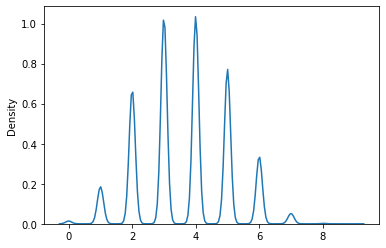

In [93]:
name_len=X_train['name1'].apply(lambda x:len(x.split())).values
sns.distplot(name_len,hist=False)

In [ ]:
max_len_name=6

In [90]:
t=Tokenizer()
t.fit_on_texts(X_train['name1'].values)

vocab_size_name=max(t.word_index.values())+1

encoded_name_train = t.texts_to_sequences(X_train['name1'].values)
encoded_name_test = t.texts_to_sequences(X_test['name'].values)

padded_name_train=pad_sequences(encoded_name_train,maxlen=max_len_name,padding='post')
padded_name_test=pad_sequences(encoded_name_test,maxlen=max_len_name,padding='post')

In [92]:
vocab_size_name

8245

In [91]:
a_num=0
for i in t.word_counts.keys():
    if t.word_counts[i]<=10:
        a_num+=1
print(a_num)

435


## removing less occuring word from item_description column

In [96]:
t=Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
t.fit_on_texts(X_train['item_description'].values)

In [97]:
X_train['item_description1']=removing_less_frequency_word('item_description',10,t.word_counts)

## tokenizing and padding item_description

C:\Users\vishw\anaconda3\envs\gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

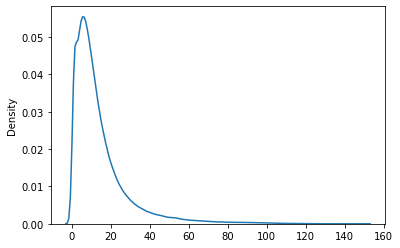

In [98]:
name_len=X_train['item_description1'].apply(lambda x:len(x.split())).values
sns.distplot(name_len,hist=False)

In [63]:
max_len_item_desc=30

In [100]:
t=Tokenizer()
t.fit_on_texts(X_train['item_description1'].values)

vocab_size_item_desc=max(t.word_index.values())+1

encoded_item_description_train = t.texts_to_sequences(X_train['item_description1'].values)
encoded_item_description_test = t.texts_to_sequences(X_test['item_description'].values)

padded_item_description_train=pad_sequences(encoded_item_description_train,maxlen=max_len_item_desc,padding='post')
padded_item_description_test=pad_sequences(encoded_item_description_test,maxlen=max_len_item_desc,padding='post')

In [101]:
a_num=0
for i in t.word_counts.keys():
    if t.word_counts[i]<=10:
        a_num+=1
print(a_num)

702


In [102]:
vocab_size_item_desc

15084

## tokenizing brand_name

In [103]:
t=Tokenizer(filters='',split='**',oov_token='unknown')
t.fit_on_texts(X_train['brand_name'].values)

vocab_size_br_name=max(t.word_index.values())+1

encoded_br_name_train = t.texts_to_sequences(X_train['brand_name'].values)
encoded_br_name_test = t.texts_to_sequences(X_test['brand_name'].values)

In [83]:
a=set()
for i in encoded_br_name_test:
    a.add(len(i))
a    

{1}

In [104]:
encoded_br_name_train = np.array(encoded_br_name_train)
encoded_br_name_test = np.array(encoded_br_name_test)

## tokenizing subcat1

In [105]:
t=Tokenizer(filters='',split='**',oov_token='unknown')
t.fit_on_texts(X_train['subcat1'].values)

vocab_size_s1=max(t.word_index.values())+1

encoded_s1_train = t.texts_to_sequences(X_train['subcat1'].values)
encoded_s1_test = t.texts_to_sequences(X_test['subcat1'].values)

In [106]:
encoded_s1_train = np.array(encoded_s1_train)
encoded_s1_test = np.array(encoded_s1_test)

## tokenizing subcat2

In [107]:
t=Tokenizer(filters='',split='**',oov_token='unknown')
t.fit_on_texts(X_train['subcat2'].values)

vocab_size_s2=max(t.word_index.values())+1

encoded_s2_train = t.texts_to_sequences(X_train['subcat2'].values)
encoded_s2_test = t.texts_to_sequences(X_test['subcat2'].values)

In [108]:
encoded_s2_train = np.array(encoded_s2_train)
encoded_s2_test = np.array(encoded_s2_test)

## tokenizing subcat3

In [109]:
t=Tokenizer(filters='',split='**',oov_token='unknown')
t.fit_on_texts(X_train['subcat3'].values)

vocab_size_s3=max(t.word_index.values())+1

encoded_s3_train = t.texts_to_sequences(X_train['subcat3'].values)
encoded_s3_test = t.texts_to_sequences(X_test['subcat3'].values)

In [110]:
encoded_s3_train = np.array(encoded_s3_train)
encoded_s3_test = np.array(encoded_s3_test)

## tokenizing subcat4

In [111]:
t=Tokenizer(filters='',split='**',oov_token='unknown')
t.fit_on_texts(X_train['subcat4'].values)

vocab_size_s4=max(t.word_index.values())+1

encoded_s4_train = t.texts_to_sequences(X_train['subcat4'].values)
encoded_s4_test = t.texts_to_sequences(X_test['subcat4'].values)

In [112]:
encoded_s4_train = np.array(encoded_s4_train)
encoded_s4_test = np.array(encoded_s4_test)

## tokenizing subcat5

In [113]:
t=Tokenizer(filters='',split='**',oov_token='unknown')
t.fit_on_texts(X_train['subcat5'].values)

vocab_size_s5=max(t.word_index.values())+1

encoded_s5_train = t.texts_to_sequences(X_train['subcat5'].values)
encoded_s5_test = t.texts_to_sequences(X_test['subcat5'].values)

In [114]:
encoded_s5_train = np.array(encoded_s5_train)
encoded_s5_test = np.array(encoded_s5_test)

## stacking numerical columns

In [115]:
x_tr_inp_num = sc.sparse.hstack((sc.sparse.csr_matrix(x_tr_category_name_len),x_tr_item_condition_id,x_tr_name_each_sen_word,x_tr_item_desc_words_len,x_tr_shipping))
x_tr_inp_num=x_tr_inp_num.asformat(format='csr')
x_te_inp_num = sc.sparse.hstack((sc.sparse.csr_matrix(x_te_category_name_len),x_te_item_condition_id,x_te_name_each_sen_word,x_te_item_desc_words_len,x_te_shipping))
x_te_inp_num=x_te_inp_num.asformat(format='csr')

NameError: name 'x_tr_category_name_len' is not defined

In [116]:
encoded_br_name_test

array([[145],
       [  9],
       [ 15],
       ...,
       [  2],
       [121],
       [233]])

## saving all encoded feature

In [117]:
# np.save('x_tr_inp_num',x_tr_inp_num)
sc.sparse.save_npz('x_tr_inp_num.npz',x_tr_inp_num)
# sc.sparse.save_npz('test_w2v.npz',x_te_w2v)
np.save('encoded_br_name_train',encoded_br_name_train)
np.save('encoded_s1_train',encoded_s1_train)
np.save('encoded_s2_train',encoded_s2_train)
np.save('encoded_s3_train',encoded_s3_train)
np.save('encoded_s4_train',encoded_s4_train)
np.save('encoded_s5_train',encoded_s5_train)
np.save('padded_name_train',padded_name_train)
np.save('padded_item_description_train',padded_item_description_train)

# np.save('x_tr_inp_num',x_tr_inp_num)
sc.sparse.save_npz('x_te_inp_num.npz',x_te_inp_num)
# sc.sparse.save_npz('test_w2v.npz',x_te_w2v)
np.save('encoded_br_name_test',encoded_br_name_test)
np.save('encoded_s1_test',encoded_s1_test)
np.save('encoded_s2_test',encoded_s2_test)
np.save('encoded_s3_test',encoded_s3_test)
np.save('encoded_s4_test',encoded_s4_test)
np.save('encoded_s5_test',encoded_s5_test)
np.save('padded_name_test',padded_name_test)
np.save('padded_item_description_test',padded_item_description_test)

## loading all encoded saved feature

In [2]:
x_tr_inp_num = sc.sparse.load_npz('x_tr_inp_num.npz')
# sc.sparse.save_npz('test_w2v.npz',x_te_w2v)
encoded_br_name_train = np.load('encoded_br_name_train.npy')
encoded_s1_train = np.load('encoded_s1_train.npy')
encoded_s2_train = np.load('encoded_s2_train.npy')
encoded_s3_train = np.load('encoded_s3_train.npy')
encoded_s4_train = np.load('encoded_s4_train.npy')
encoded_s5_train = np.load('encoded_s5_train.npy')
padded_name_train = np.load('padded_name_train.npy')
padded_item_description_train = np.load('padded_item_description_train.npy')
y_train=np.load('y_train.npy')

x_te_inp_num = sc.sparse.load_npz('x_te_inp_num.npz')
# sc.sparse.save_npz('test_w2v.npz',x_te_w2v)
encoded_br_name_test = np.load('encoded_br_name_test.npy')
encoded_s1_test = np.load('encoded_s1_test.npy')
encoded_s2_test = np.load('encoded_s2_test.npy')
encoded_s3_test = np.load('encoded_s3_test.npy')
encoded_s4_test = np.load('encoded_s4_test.npy')
encoded_s5_test = np.load('encoded_s5_test.npy')
padded_name_test = np.load('padded_name_test.npy')
padded_item_description_test = np.load('padded_item_description_test.npy')

y_test=np.load('y_test.npy')

vocab_size_name=8245
max_len_item_desc=30
max_len_name=6
vocab_size_item_desc=15084
vocab_size_br_name=4299
vocab_size_s1=12
vocab_size_s2=104
vocab_size_s3=644
vocab_size_s4=8
vocab_size_s5=5

In [59]:
vocab_size_s5

5

In [3]:
tf.compat.v1.enable_eager_execution()

## model structure

In [33]:
# input_shape = (4,4297)
# x = np.array([0,0,0,0,1])

input_num = Input(shape=(x_tr_inp_num.shape[1]),name='input1')

input_br_name = Input(shape=(1),name='input2')

input_subcat1 = Input(shape=(1),name='input3')

input_subcat2 = Input(shape=(1),name='input4')

input_subcat3 = Input(shape=(1),name='input5')

input_subcat4 = Input(shape=(1),name='input6')

input_subcat5 = Input(shape=(1),name='input7')



input_name_text = Input(shape=(max_len_name),name='input8')

input_item_desc_text = Input(shape=(max_len_item_desc),name='input9')

embedding1 = Embedding(vocab_size_br_name,50,input_length=1)(input_br_name)
# print(embedding1)
embedding2 = Embedding(vocab_size_s1,50,input_length=1)(input_subcat1)
embedding3 = Embedding(vocab_size_s2,50,input_length=1)(input_subcat2)
embedding4 = Embedding(vocab_size_s3,50,input_length=1)(input_subcat3)
embedding5 = Embedding(vocab_size_s4,10,input_length=1)(input_subcat4)
embedding6 = Embedding(vocab_size_s5,10,input_length=1)(input_subcat5)


embedding7 = Embedding(vocab_size_name,100,input_length=max_len_name)(input_name_text)

embedding8 = Embedding(vocab_size_item_desc,100,input_length=max_len_item_desc)(input_item_desc_text)

flatten1=Flatten()(embedding1)
flatten2=Flatten()(embedding2)
flatten3=Flatten()(embedding3)
flatten4=Flatten()(embedding4)
flatten5=Flatten()(embedding5)
flatten6=Flatten()(embedding6)
flatten7=Flatten()(embedding7)
flatten8=Flatten()(embedding8)

merge1=Concatenate()([input_num,flatten1,flatten2,flatten3,flatten4,flatten5,flatten6,flatten7,flatten8])

dense1=Dense(32,activation='relu', kernel_regularizer=l2(0.001))(merge1)
# dropout1=Dropout(.5)(dense1)
dense2=Dense(32,activation='relu', kernel_regularizer=l2(0.001))(dense1)
dropout2=Dropout(.5)(dense2)
dense3=Dense(32,activation='relu', kernel_regularizer=l2(0.001))(dropout2)
output=Dense(1,activation=None)(dense3)

model=tf.keras.Model(inputs=[input_num,input_br_name,input_subcat1,input_subcat2,input_subcat3,
                             input_subcat4,input_subcat5,input_name_text,input_item_desc_text],outputs=[output])



In [34]:
padded_item_description_train.shape

(566423, 30)

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_cp = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [36]:
model.compile(optimizer='Adam',loss='mse')
model.fit({"input1":x_tr_inp_num,"input2":encoded_br_name_train,"input3":encoded_s1_train,"input4":encoded_s2_train,
           "input5":encoded_s3_train,"input6":encoded_s4_train,"input7":encoded_s5_train,"input8":padded_name_train,
           "input9":padded_item_description_train},
         y_train.ravel(),
         validation_data=([x_te_inp_num,encoded_br_name_test,encoded_s1_test,encoded_s2_test,encoded_s3_test,encoded_s4_test,
                          encoded_s5_test,padded_name_test,padded_item_description_test],y_test.ravel()),
         epochs=20,batch_size=128,callbacks=[early_stop,model_cp])

Epoch 1/20
4426/4426 [==============================] - 208s 47ms/step - loss: 1102.3969 - val_loss: 905.9874
Epoch 2/20
4426/4426 [==============================] - 241s 55ms/step - loss: 797.3879 - val_loss: 893.9278
Epoch 3/20
4426/4426 [==============================] - 242s 55ms/step - loss: 624.0776 - val_loss: 923.1677
Epoch 4/20
4426/4426 [==============================] - 245s 55ms/step - loss: 539.6375 - val_loss: 928.6626
Epoch 5/20
4426/4426 [==============================] - 237s 54ms/step - loss: 461.2256 - val_loss: 994.6908
Epoch 6/20
4426/4426 [==============================] - 234s 53ms/step - loss: 418.4202 - val_loss: 1006.0756
Epoch 7/20
4426/4426 [==============================] - 238s 54ms/step - loss: 369.5937 - val_loss: 1123.0813
Epoch 00007: early stopping


# making pipeline